# Importing libraries

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Loading dataset

In [183]:
df = pd.read_csv('/content/drive/MyDrive/mlb11.csv',index_col=0)
df.head()

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
1,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
2,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
3,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
4,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
5,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766


In [184]:
df.describe()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,693.600000,5523.500000,1408.900000,151.733333,0.254933,1149.600000,109.300000,80.966667,0.320467,0.398833,0.71910
std,82.479088,79.873067,87.081947,35.587612,0.012744,108.049988,29.868851,11.415305,0.013441,0.029131,0.04155
min,556.000000,5417.000000,1263.000000,91.000000,0.233000,930.000000,49.000000,56.000000,0.292000,0.348000,0.64000
25%,629.000000,5448.250000,1348.000000,118.000000,0.244750,1085.250000,89.750000,72.000000,0.311000,0.377000,0.69200
50%,705.500000,5515.500000,1394.500000,154.000000,0.253000,1140.500000,107.000000,80.000000,0.318500,0.398500,0.71600
75%,734.000000,5575.000000,1441.000000,172.750000,0.260250,1247.750000,130.750000,90.000000,0.328250,0.413000,0.73825
max,875.000000,5710.000000,1600.000000,222.000000,0.283000,1323.000000,170.000000,102.000000,0.349000,0.461000,0.81000


# Correlation

### Plot correlation matrix

In [185]:
df.corr(method="pearson").style.background_gradient()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
runs,1.000000,0.610627,0.801211,0.791558,0.809986,-0.411531,0.053981,0.600809,0.921469,0.947032,0.966916
at_bats,0.610627,1.000000,0.846472,0.376515,0.755374,-0.463424,-0.107529,0.062156,0.598145,0.620277,0.627909
hits,0.801211,0.846472,1.000000,0.470838,0.987958,-0.617228,-0.126330,0.297659,0.854846,0.818238,0.850833
homeruns,0.791558,0.376515,0.470838,1.000000,0.471511,-0.170755,-0.117324,0.660614,0.616327,0.862832,0.810667
bat_avg,0.809986,0.755374,0.987958,0.471511,1.000000,-0.634814,-0.123147,0.350793,0.882302,0.828490,0.867099
strikeouts,-0.411531,-0.463424,-0.617228,-0.170755,-0.634814,1.000000,0.087642,-0.280727,-0.486880,-0.409822,-0.443975
stolen_bases,0.053981,-0.107529,-0.126330,-0.117324,-0.123147,0.087642,1.000000,-0.064594,-0.033256,-0.074128,-0.061846
wins,0.600809,0.062156,0.297659,0.660614,0.350793,-0.280727,-0.064594,1.000000,0.552278,0.614166,0.612075
new_onbase,0.921469,0.598145,0.854846,0.616327,0.882302,-0.486880,-0.033256,0.552278,1.000000,0.871865,0.937283
new_slug,0.947032,0.620277,0.818238,0.862832,0.828490,-0.409822,-0.074128,0.614166,0.871865,1.000000,0.987764


### Drop variables with low correlation to *runs*

In [186]:
df = df.drop(['team','at_bats','strikeouts','stolen_bases','wins'],axis=1)
df.head()

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
1,855,1599,210,0.283,0.340,0.460,0.800
2,875,1600,203,0.280,0.349,0.461,0.810
3,787,1540,169,0.277,0.340,0.434,0.773
4,730,1560,129,0.275,0.329,0.415,0.744
5,762,1513,162,0.273,0.341,0.425,0.766


# EDA

### Defining functions

In [197]:
def df_transform(data,transform="None"):
  for col in data.columns:
    if transform == 'log':
      data[col] = list(map(np.log,data[col]))
    elif transform == 'square':
      data[col] = list(map(np.square,data[col]))
    elif transform == 'root':
      data[col] = list(map(np.sqrt,data[col]))
    else: 
      pass
  
  return data

def plot_hist(data,transform="None"):
  data = df_transform(data,transform)

  count = 1
  plt.figure(figsize=(16,8))
  for col in data.columns:
    if col == 'runs':
      pass
    else: 
      plt.subplot(2,3,count)
      plt.hist(data[col])
      plt.title(col)
      count = count + 1

  plt.figure()
  plt.hist(data['runs'])
  plt.title('runs')

def plot_scatter(data,transform="None"):
  
  data = df_transform(data,transform)
  print (data.corr(method="pearson").style.background_gradient())

  count = 1
  plt.figure(figsize=(16,8))
  for col in data.columns:
    if col == "runs":
      pass
    else:
      a, b = np.polyfit(data["runs"], data[col], 1)
      plt.subplot(2,3,count)
      plt.scatter(data["runs"],data[col])
      plt.plot(np.array(data['runs']),a*np.array(data['runs'])+b,alpha=0.3,color='red')
      plt.xlabel("runs")
      plt.ylabel(col)
      count = count + 1
  plt.show()

### Plot histograms - *default* data

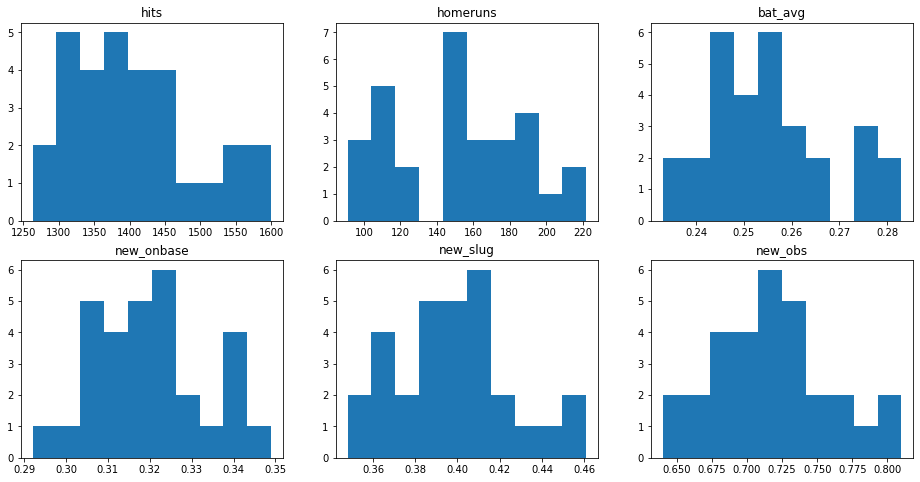

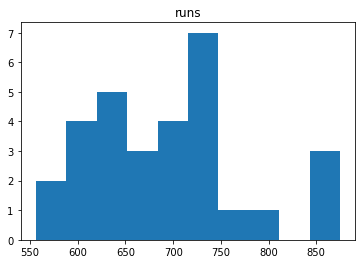

In [188]:
plot_hist(df)

### Plot histogram - *log* data

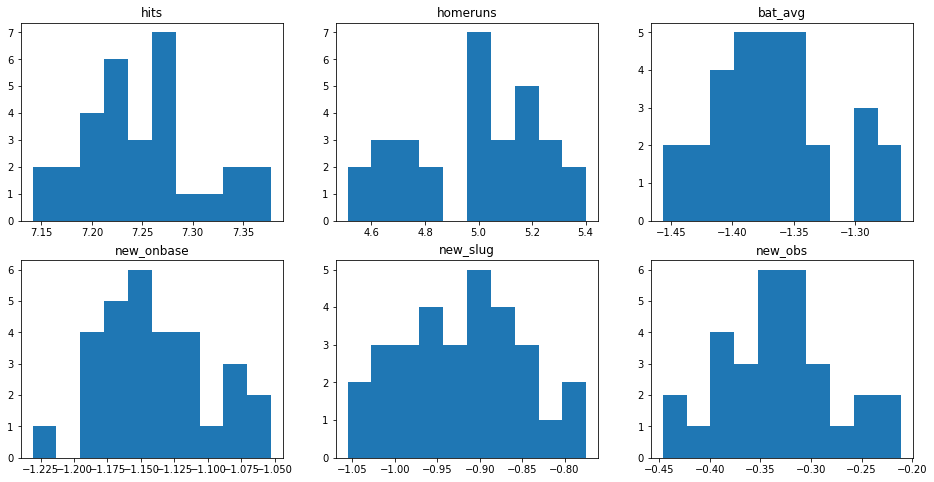

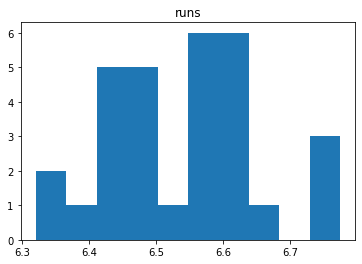

In [189]:
plot_hist(df.copy(),'log')

### Plot histogram - *square root* data

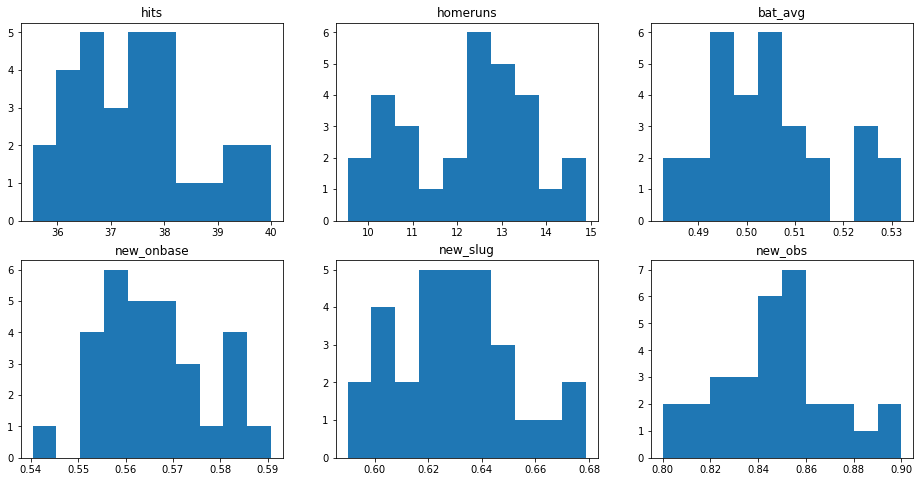

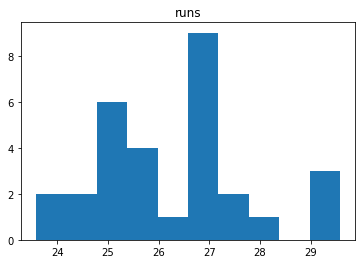

In [190]:
plot_hist(df.copy(),"root")

Plot histogram - *square* data

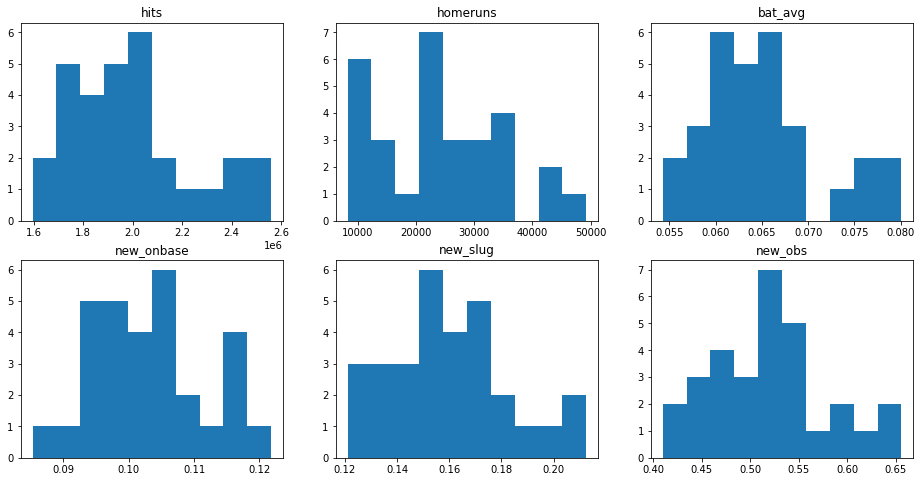

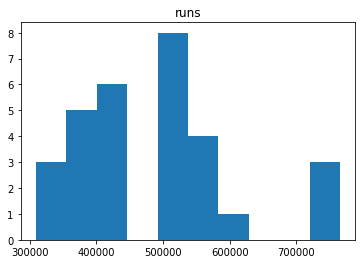

In [191]:
plot_hist(df.copy(),"square")

### Plot scatter - *default* data

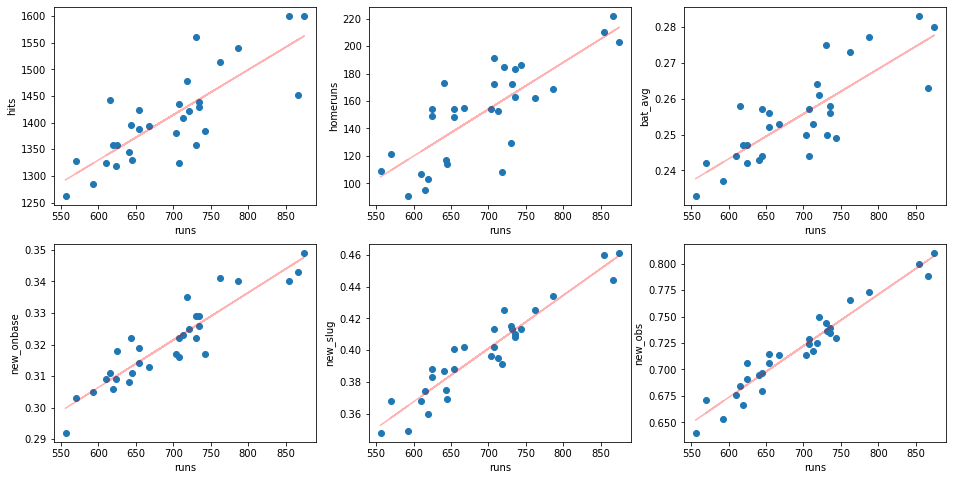

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
runs,1.000000,0.801211,0.791558,0.809986,0.921469,0.947032,0.966916
hits,0.801211,1.000000,0.470838,0.987958,0.854846,0.818238,0.850833
homeruns,0.791558,0.470838,1.000000,0.471511,0.616327,0.862832,0.810667
bat_avg,0.809986,0.987958,0.471511,1.000000,0.882302,0.828490,0.867099
new_onbase,0.921469,0.854846,0.616327,0.882302,1.000000,0.871865,0.937283
new_slug,0.947032,0.818238,0.862832,0.828490,0.871865,1.000000,0.987764
new_obs,0.966916,0.850833,0.810667,0.867099,0.937283,0.987764,1.000000


In [192]:
plot_scatter(df.copy())
df.corr(method="pearson").style.background_gradient()

### Plot scatter - *log* data

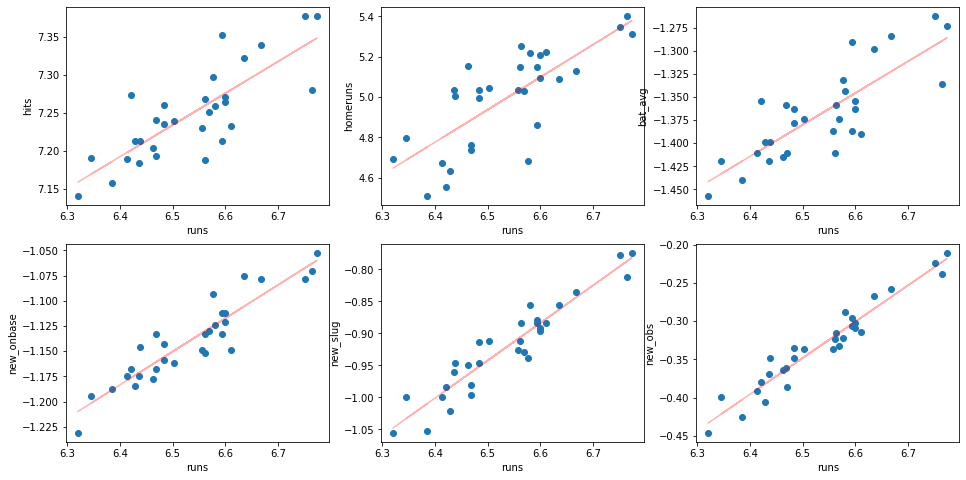

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
runs,1.000000,0.801896,0.765559,0.811187,0.923602,0.944509,0.966256
hits,0.801896,1.000000,0.456900,0.988072,0.856256,0.815886,0.850473
homeruns,0.765559,0.456900,1.000000,0.456232,0.600163,0.854989,0.799060
bat_avg,0.811187,0.988072,0.456232,1.000000,0.883530,0.825279,0.866180
new_onbase,0.923602,0.856256,0.600163,0.883530,1.000000,0.870952,0.937168
new_slug,0.944509,0.815886,0.854989,0.825279,0.870952,1.000000,0.987520
new_obs,0.966256,0.850473,0.799060,0.866180,0.937168,0.987520,1.000000


In [193]:
plot_scatter(df.copy(),"log")
df_log = df_transform(df.copy(),"log")
df_log.corr(method="pearson").style.background_gradient()

### Plot scatter - *square root* data

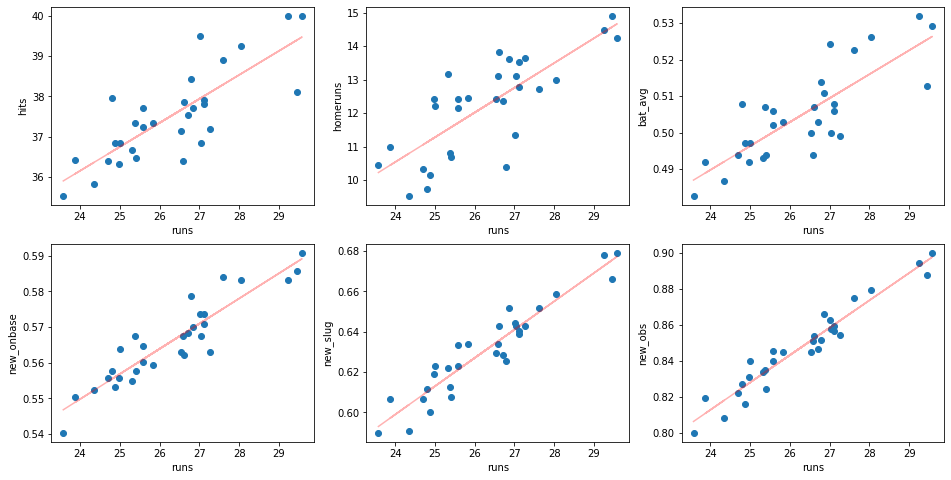

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
runs,1.000000,0.801712,0.778814,0.810805,0.922766,0.945914,0.966759
hits,0.801712,1.000000,0.464005,0.988025,0.855585,0.817011,0.850630
homeruns,0.778814,0.464005,1.000000,0.464057,0.608649,0.859526,0.805458
bat_avg,0.810805,0.988025,0.464057,1.000000,0.882937,0.826880,0.866640
new_onbase,0.922766,0.855585,0.608649,0.882937,1.000000,0.871444,0.937240
new_slug,0.945914,0.817011,0.859526,0.826880,0.871444,1.000000,0.987650
new_obs,0.966759,0.850630,0.805458,0.866640,0.937240,0.987650,1.000000


In [195]:
plot_scatter(df.copy(),"root")
df_root = df_transform(df.copy(),"root")
df_root.corr(method="pearson").style.background_gradient()

### Plot scatter - *square* data

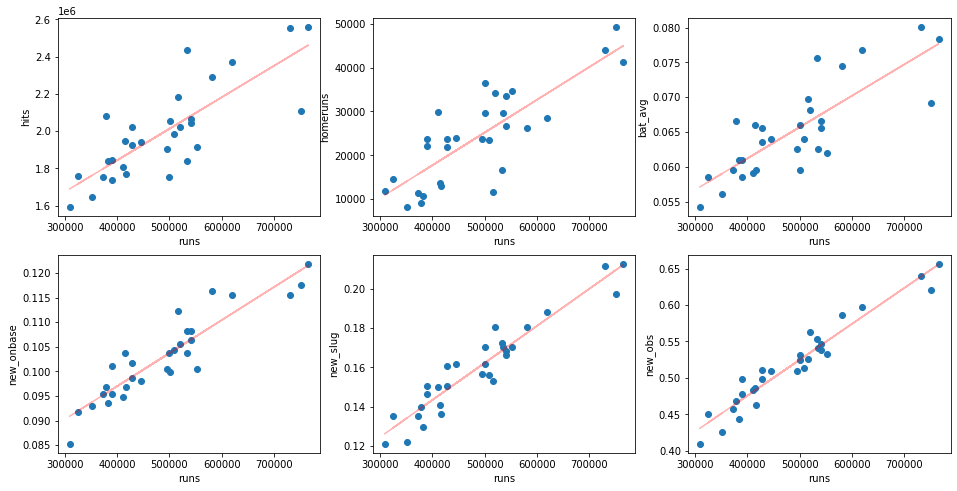

,runs,hits,homeruns,bat_avg,new_onbase,new_slug,new_obs
runs,1.000000,0.799188,0.814962,0.806960,0.917469,0.948422,0.966197
hits,0.799188,1.000000,0.482799,0.987757,0.853154,0.820966,0.851361
homeruns,0.814962,0.482799,1.000000,0.484398,0.628681,0.865289,0.816984
bat_avg,0.806960,0.987757,0.484398,1.000000,0.880893,0.831691,0.867991
new_onbase,0.917469,0.853154,0.628681,0.880893,1.000000,0.872466,0.937276
new_slug,0.948422,0.820966,0.865289,0.831691,0.872466,1.000000,0.987938
new_obs,0.966197,0.851361,0.816984,0.867991,0.937276,0.987938,1.000000


In [196]:
plot_scatter(df.copy(),"square")
df_square = df_transform(df.copy(),"square")
df_square.corr(method="pearson").style.background_gradient()